# Check which window_size, alpha parameters tend to give best R^2

In [1]:
library(CpGWAS)

In [2]:
my_scaff <- readRDS("../output/libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-1corestotal-1corepera-20240131-122515.rds")

In [3]:
my_scaff@models[[10]]

An object of class "MethylationBase"
Slot "methylationPosition":
[1] 87818244

Slot "windowSize":
[1] 2000

Slot "n_SNPs":
[1] 6

Slot "glmnetModel":
NULL

Slot "snpWeights":
named numeric(0)

Slot "intercept":
          s0 
3.252064e-16 

Slot "alpha":
[1] 1

Slot "lambda":
[1] 0.006789784

Slot "evaluation_results":
        cor         mse 
         NA 0.001801215 


In [4]:
convertToDataFrame <- function(object) {
  if (!inherits(object, "MethylationScaff")) {
    stop("The object must be of class 'MethylationScaff'.")
  }

  modelsList <- lapply(object@models, function(model) {
    data.frame(
      scaffoldIdentifier = object@scaffoldIdentifier,  # Scaffold identifier is the same for all models
      methylationPosition = model@methylationPosition,
      windowSize = model@windowSize,
      nSNPs = model@n_SNPs,
      cor = model@evaluation_results['cor'],
      mse = model@evaluation_results['mse'],
      alpha = model@alpha,
      lambda = model@lambda
    )
  })

  do.call("rbind", modelsList)
}

In [5]:
df <- convertToDataFrame(my_scaff)

In [6]:
dim(df)

[1] 7364    8

What percentage of models have all coefficients dropped during regularization?

In [7]:
sum(is.na(df$cor))/dim(df)[1]

[1] 0.4190657

What if we limit to the best model for each positions?

In [8]:
dim(df[which(df$methylationPosition == 87818200), ])

[1] 8 8

In [9]:
df[which(df$methylationPosition == 87818200 &
         df$windowSize == 2000), ]

,scaffoldIdentifier,methylationPosition,windowSize,nSNPs,cor,mse,alpha,lambda
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cor1,libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-static-1corestotal-1corepera-20240131-122515,87818200,2000,7,NA,0.001740676,0.25,0.02598533


In [17]:
df[1:8, 1:8]

,scaffoldIdentifier,methylationPosition,windowSize,nSNPs,cor,mse,alpha,lambda
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cor,libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519,87818200,1e+03,3,NA,0.001832257,0.25,0.01921989
cor1,libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519,87818200,2e+03,7,NA,0.001787894,0.25,0.02598533
cor2,libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519,87818200,5e+03,15,NA,0.001819706,0.25,0.02598533
cor3,libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519,87818200,1e+04,25,NA,0.001831866,0.25,0.02686158
cor4,libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519,87818200,2e+04,42,NA,0.001787894,0.25,0.03218157
cor5,libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519,87818200,5e+04,100,NA,0.001787894,0.25,0.03616203
cor6,libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519,87818200,1e+05,235,NA,0.001787894,0.25,0.04395327
cor7,libd_chr1-chr1_AA-libd_chr1-chr1_AA-1000000-1001000-dynamic-1corestotal-1corepera-20240131-122519,87818200,5e+05,1336,NA,0.001787894,0.25,0.06007843


## Which alpha, window_size tend to give most `NA`?

We get `NA` values for cor when all SNPs are dropped during regularization.

In [19]:
library(dplyr)
library(ggplot2)

# For alpha
na_percentage_alpha <- df %>%
  group_by(alpha) %>%
  summarise(PercentageNA = mean(is.na(cor)) * 100)

# For windowSize
na_percentage_windowSize <- df %>%
  group_by(windowSize) %>%
  summarise(PercentageNA = mean(is.na(cor)) * 100)


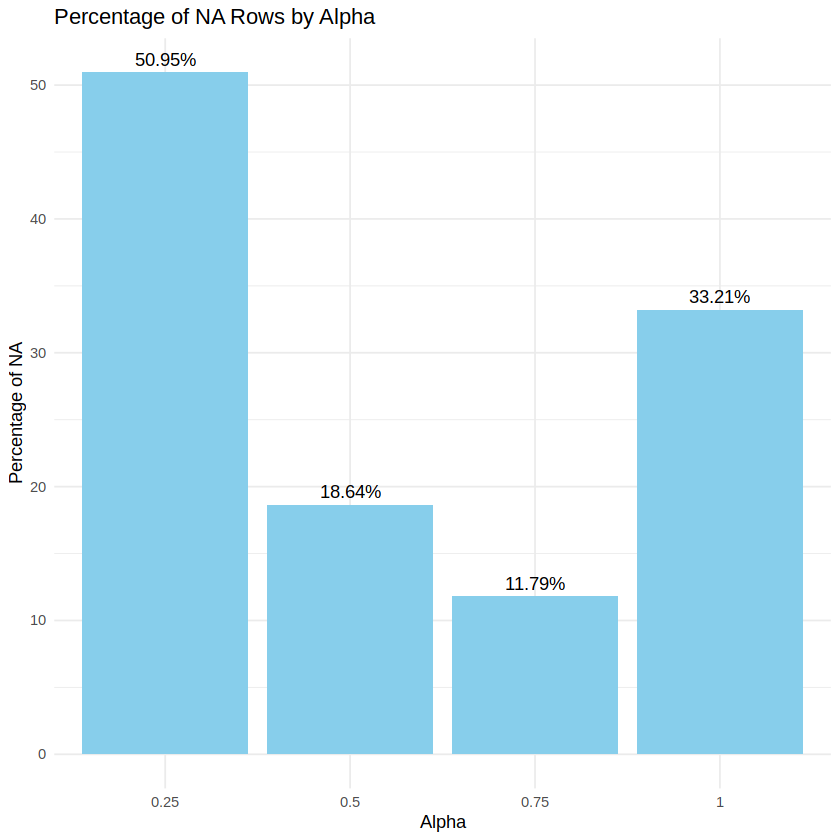

In [20]:
ggplot(na_percentage_alpha, aes(x = as.factor(alpha), y = PercentageNA)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_text(aes(label = sprintf("%.2f%%", PercentageNA)), vjust = -0.5) +
  theme_minimal() +
  labs(title = "Percentage of NA Rows by Alpha", x = "Alpha", y = "Percentage of NA")


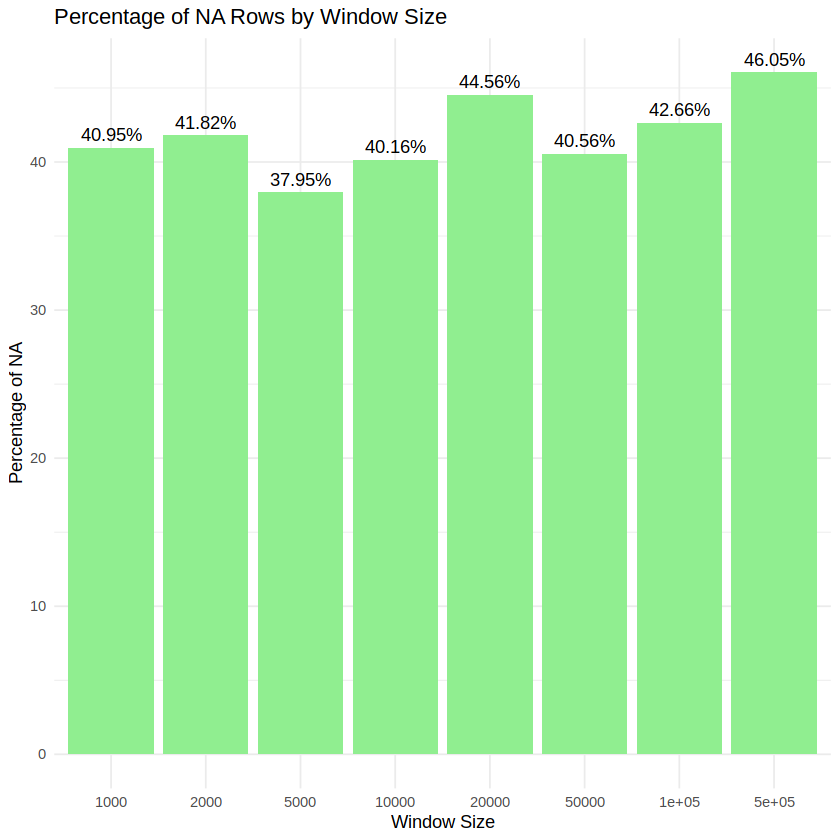

In [21]:
ggplot(na_percentage_windowSize, aes(x = as.factor(windowSize), y = PercentageNA)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  geom_text(aes(label = sprintf("%.2f%%", PercentageNA)), vjust = -0.5) +
  theme_minimal() +
  labs(title = "Percentage of NA Rows by Window Size", x = "Window Size", y = "Percentage of NA")


In [24]:
install.packages("GGally")

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


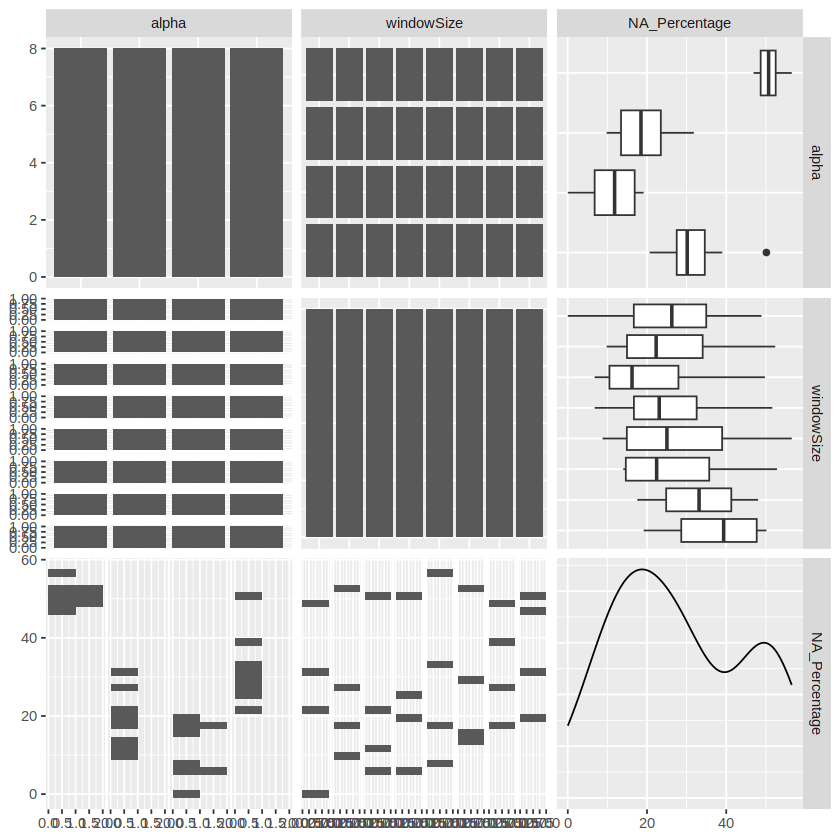

In [25]:
# Assuming df is your dataset
library(dplyr)
library(GGally)

# Calculate NA percentage for each alpha and windowSize combination
na_percentage_combined <- df %>%
  group_by(alpha, windowSize) %>%
  summarise(NA_Percentage = mean(is.na(cor)) * 100, .groups = 'drop')

# Convert alpha and windowSize to factors if they're numeric and have a reasonable number of unique values
na_percentage_combined$alpha <- factor(na_percentage_combined$alpha)
na_percentage_combined$windowSize <- factor(na_percentage_combined$windowSize)

# Plot
GGally::ggpairs(na_percentage_combined, columns = c("alpha", "windowSize", "NA_Percentage"))


## See which have best `alpha`, `window_size` tend to give best R^2 (`cor1`)

In [10]:
library(dplyr)

# Assuming your data frame is named df
filtered_df <- df %>%
  filter(!is.na(cor)) %>%
  group_by(methylationPosition) %>%
  slice(which.max(cor))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Which have NA for all?

In [11]:
na_positions <- df %>%
  group_by(methylationPosition) %>%
  filter(all(is.na(cor))) %>%
  summarise() %>%
  pull(methylationPosition)


In [14]:
length(na_positions)

[1] 24

In [15]:
na_positions_df <- df %>%
  filter(methylationPosition %in% na_positions)


In [17]:
na_positions

[1] 87818847 87822995 87833472 87873493 87878129 87880578 87885717 87887534
 [9] 87889242 87891148 87892884 87895055 87895602 87912239 87935741 87935785
[17] 87950536 87950933 87950993 87953395 87953604 87955838 87958491 87964841

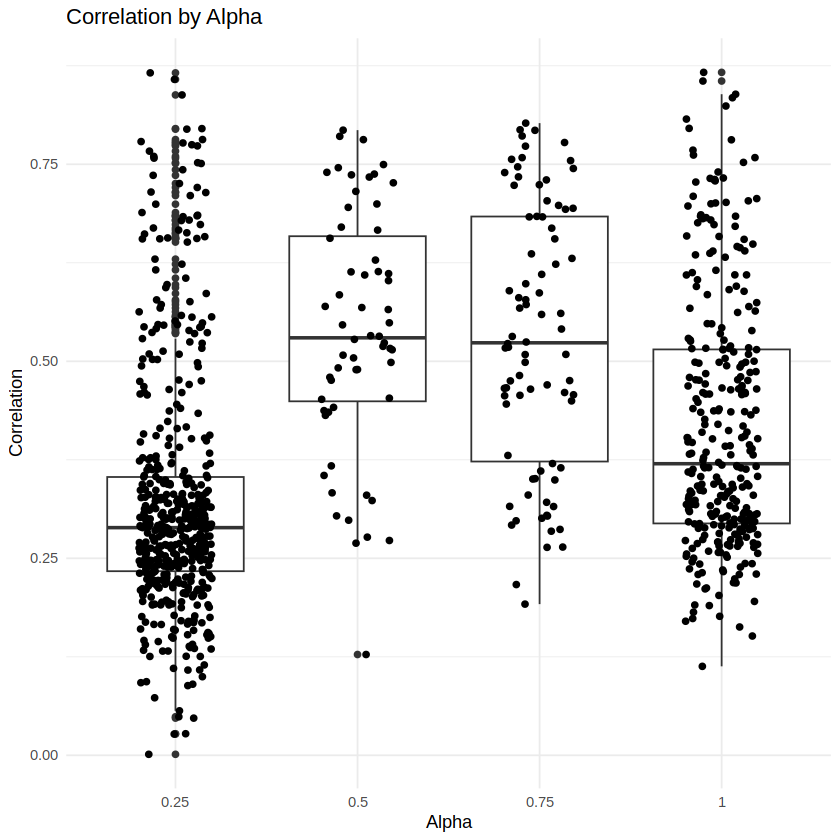

In [13]:
library(ggplot2)

ggplot(filtered_df, aes(x = as.factor(alpha), y = cor)) +
  geom_boxplot() +
  geom_jitter(width = 0.2) +
  theme_minimal() +
  labs(title = "Correlation by Alpha", x = "Alpha", y = "Correlation")


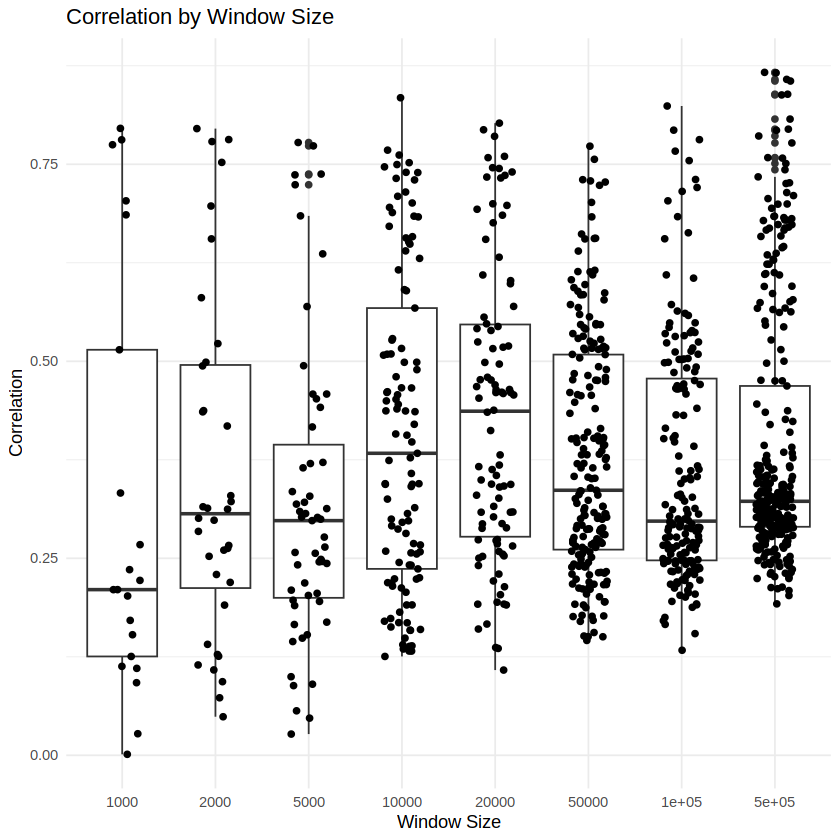

In [18]:
ggplot(filtered_df, aes(x = as.factor(windowSize), y = cor)) +
  geom_boxplot() +
  geom_jitter(width = 0.2) +
  theme_minimal() +
  labs(title = "Correlation by Window Size", x = "Window Size", y = "Correlation")